In [66]:
import rasterio as rs
from mpl_toolkits.basemap import Basemap
shp = '/Volumes/data/como_watershed_wgs84.shp'
shp2 = './data/treeline'

def coord2dd(d,m,s): return d+(m/60.)+(s/60.)

In [67]:
m = Basemap(llcrnrlon=-105.589055,llcrnrlat=40.028110,urcrnrlon=-105.536208,
            urcrnrlat=40.057846,resolution=None,projection='merc',
            lon_0=coord2dd(105,33,45.03),lat_0=coord2dd(40,2,4.58))

In [104]:
lai = [1.07,1.08,1.08,1.10,1.11,1.16,1.15,1.14,1.09] # landsat lai for cells around Nr1
obsLAI = 4.2 # Turnipseed et al., 2002

meanLAI = np.mean(lai)
scale = obsLAI/meanLAI

In [ ]:
# infl = '/RHESSys/Como/auxdata/landsat_LAI_Boulder_30m_crop.tiff'
outfl = '/RHESSys/Como/auxdata/landsat_LAI_Boulder_30m_crop_scaled.tiff'

In [57]:
# read in the original landsat data
with rs.open(infl,'r') as ds:
    profile = ds.profile
    rast = ds.read(1)

In [95]:
with rs.open('/RHESSys/Como/auxdata/nlcd_vegID_30m.tiff','r') as ds:
    lc = ds.read(1)

with rs.open('/RHESSys/Como/auxdata/BCCZO_DEM_crop_30m.tiff','r') as ds:
    dem = ds.read(1)

2.4149008847


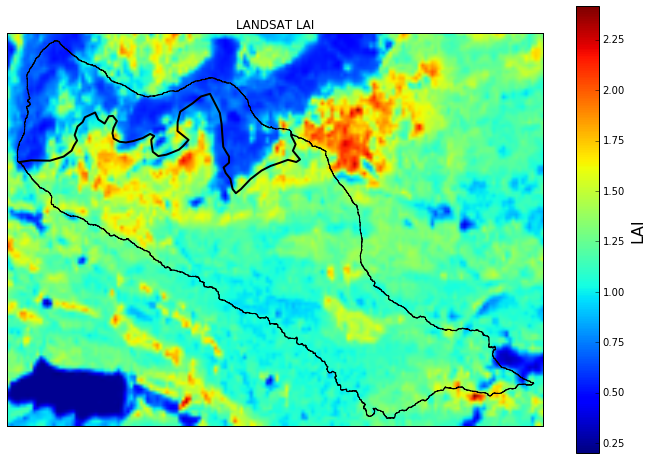

In [207]:
plt.figure(figsize=(12,8))
m.imshow(np.flipud(rast))
cb=plt.colorbar();
m.readshapefile(shp[0:-4],shp.split('/')[-1].split('.')[0], color='k', linewidth=1);
m.readshapefile(shp2,'tree_line',linewidth=2);
plt.title('LANDSAT LAI');
cb.set_label('LAI', fontsize=16)
print rast.max()

In [200]:
weight = 1-(rast/rast.max()+0.1)# make the high values 1

In [201]:
corr_rast = rast*scale # produce the scaled map
diff_rast = corr_rast-rast # produce the difference map
new_diff = diff_rast*weight

new_corr = rast+new_diff

2.66645543002


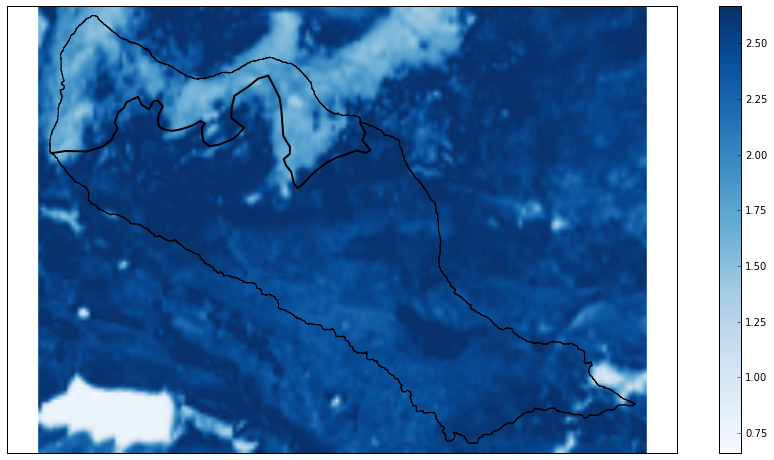

In [202]:
plt.figure(figsize=(15,8))
m.imshow(np.flipud(new_corr),cmap='Blues')
m.readshapefile(shp[0:-4],shp.split('/')[-1].split('.')[0], color='k', linewidth=1);
m.readshapefile(shp2,'tree_line',linewidth=2);
plt.colorbar()
plt.axis('equal')
print new_corr.max()

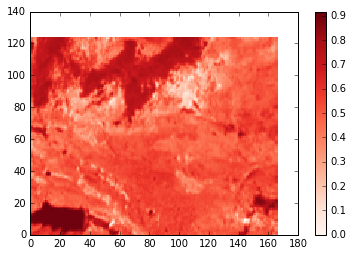

In [182]:
plt.pcolormesh(np.flipud(weight),cmap='Reds')
plt.colorbar()

In [172]:
weight = rast-meanLAI
weight /= scale
weight = 1 - weight

In [175]:
thresh = 1.05
landcover = rast.copy()
landcover[rast<thresh] = 2
landcover[rast>=thresh] = 4

landcover[dem<3350] = 4

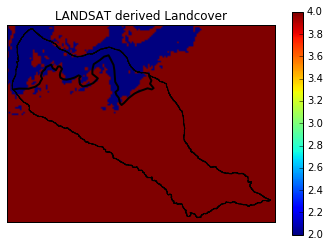

In [176]:
m.imshow(np.flipud(landcover));
plt.colorbar();
m.readshapefile(shp[0:-4],shp.split('/')[-1].split('.')[0], color='k', linewidth=1);
m.readshapefile(shp2,'tree_line',linewidth=2);
plt.title('LANDSAT derived Landcover')

In [193]:
corr_rast = weight*rast*scale
new_corr[landcover==2]=rast[landcover==2]

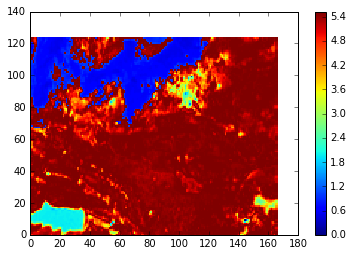

In [178]:
plt.pcolor(np.flipud(corr_rast))
plt.colorbar()

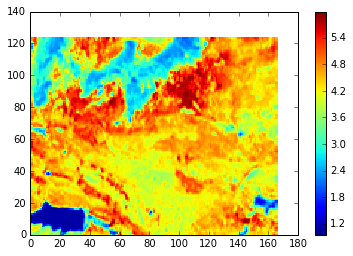

In [156]:
plt.pcolormesh(np.flipud(corr_rast))
plt.colorbar()

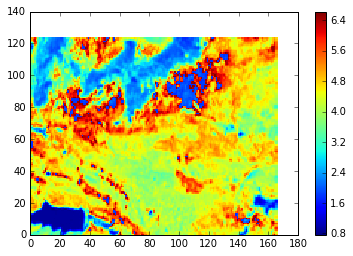

In [30]:
plt.pcolor(np.flipud(corr_rast))
plt.colorbar()